In [1]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
giftsDF=pd.read_csv('../data/gifts.csv')
sampleDF=pd.read_csv('../data/sample_submission.csv')

In [3]:
import mTSP
import imp
imp.reload(mTSP)

<module 'mTSP' from '/Users/rspeare/Code/python/kaggle/santa/src/mTSP.py'>

In [4]:
m=mTSP.mission(10)
#m.read_submission('../data/2002.csv')
m.init_trips_by_longitude()

234325423593.71149

In [5]:
#m.reorder_all_trips()
m.reorder_all_trips()
print(m.loss())
lds=m.check_loads()
m.check_tmap()

188665165742.0


In [29]:
#m.read_submission('../data/kmeans_2000_greedy.csv')
fname='../data/2002.csv'
m.read_submission(fname)
m.check_loads()
m.check_tmap()
print(m.loss())
print(len(m.trips))


getting ready to index trips
indexing now...
13841758314.0
8398


In [30]:
import numpy as np
t=10**3.5
m0=10**4
i=0
while(True):
    i+=1
    m.burn_merge(m0,t)
    var=m.burn_Kswap(3,m0,t,m.gifts)
    m.burn_merge(10*m0,t)
    m.reorder_all_trips()
    m.check_tmap()
    m.check_loads()
    print('score : '+str(m.loss())+' temp: '+str(t)+' var '+str(var))
    if (var < 3.0):
        t*=0.99
    if (i %10 ==0):
        print('writing to file...')
        m.write_submission(fname)
        m.read_submission(fname)
        print('number of trips ',len(m.trips))

score : 13841852558.0 temp: 3162.2776601683795 var 0.044181537452
score : 13842038719.0 temp: 3130.654883566696 var 0.0520694581354
score : 13842047054.5 temp: 3099.348334731029 var 0.0351857309079
score : 13842129884.5 temp: 3068.3548513837186 var 0.0256449516469
score : 13842190825.1 temp: 3037.6713028698814 var 0.0274958588863
score : 13842233162.2 temp: 3007.2945898411826 var 0.0363077381415
score : 13842287025.6 temp: 2977.2216439427707 var 0.00740472476305
score : 13842269285.2 temp: 2947.449427503343 var 0.016334932904
score : 13842370040.4 temp: 2917.9749332283095 var 0.0524553973673
score : 13842452647.4 temp: 2888.795183896026 var 0.0157570474388
writing to file...
getting ready to index trips
indexing now...
number of trips  8392
score : 13842497668.2 temp: 2859.907232057066 var 0.0338449119505
score : 13842582393.7 temp: 2831.3081597364953 var 0.0100456871289
score : 13842548310.9 temp: 2802.9950781391303 var 0.045523484327
score : 13842595601.1 temp: 2774.965127357739 var 

KeyboardInterrupt: 

In [162]:
for i in np.arange(10):
    m.burn_merge(2*10**5,10**3)
    m.check_tmap()
    m.check_loads()
    print('score : ',m.loss())

In [156]:
m.check_tmap()
lds=m.check_loads()
m.write_submission('../data/2002.csv')

In [21]:
X=giftsDF[['Latitude','Longitude']].values

In [74]:
est=KMeans(3000)

In [75]:
est.n_clusters

3000

In [76]:
est.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3000,
    n_init=10, n_jobs=1, precompute_distances='auto', random_state=None,
    tol=0.0001, verbose=0)

In [77]:
y=est.predict(X)

In [78]:
sampleDF.TripId=y

In [79]:
giftsDF.head()

,GiftId,Latitude,Longitude,Weight
0,1,16.345769,6.303545,1.000000
1,2,12.494749,28.626396,15.524480
2,3,27.794615,60.032495,8.058499
3,4,44.426992,110.114216,1.000000
4,5,-69.854088,87.946878,25.088892


In [80]:
XX=np.vstack([giftsDF.GiftId,y,giftsDF.Weight]).T

In [81]:
XX

array([[  1.00000000e+00,   2.65200000e+03,   1.00000000e+00],
       [  2.00000000e+00,   2.62600000e+03,   1.55244796e+01],
       [  3.00000000e+00,   1.99500000e+03,   8.05849862e+00],
       ..., 
       [  9.99980000e+04,   5.17000000e+02,   1.00000000e+00],
       [  9.99990000e+04,   2.98900000e+03,   1.00000000e+00],
       [  1.00000000e+05,   2.07500000e+03,   1.00000000e+00]])

In [82]:
est.score(X)

-107113.92974438409

In [83]:
import mTSP

In [84]:
m=mTSP.mission(1)

In [85]:
sampleDF.to_csv('kmeans_sub.csv')

In [137]:
m.read_submission('kmeans_sub.csv')

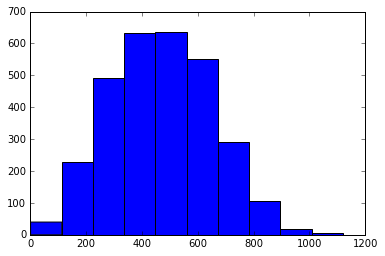

In [139]:
loads=[]
for i in np.arange(len(m.trips)):
    load=sum([m.wmap[g] for g in m.trips[i]])
    loads.append(load)
plt.hist(loads)
plt.show()

In [136]:
bads=[]
index=3
while (True):
    try:
        m.check_trip_load(m.trips[bad_trips[index]],bad_trips[index])
    except:
        bads.append(m.trips[bad_trips[index]].pop())
        m.reindex_trip(bad_trips[index])
    if (sum([m.wmap[g] for g in m.trips[bad_trips[index]]]) > 990.):
        break

KeyboardInterrupt: 

In [104]:
bads=[]
try:
    m.check_trip_load(m.trips[bad_trips[0]],bad_trips[0])
except:
    bads.append(m.trips[bad_trips[0]].pop())
    m.reindex_trip(0)
#    m.trips.append([top])

In [105]:
[[g,m.wmap[g]] for g in m.trips[bad_trips[0]]]

[[1287, 40.398779194100001],
 [2249, 40.641965859499997],
 [2611, 43.797077742700004],
 [8733, 5.6492767303299996],
 [9599, 16.3068438098],
 [9866, 13.8530161476],
 [10966, 50.0],
 [11009, 3.9304626900999997],
 [12365, 1.0],
 [13173, 1.0],
 [18232, 1.0],
 [18363, 15.723155459400001],
 [18913, 1.0],
 [19625, 1.0],
 [20776, 17.534406908499999],
 [21833, 18.047353406300001],
 [22406, 1.0],
 [23298, 1.3438771444199999],
 [24014, 6.0124244133699998],
 [24958, 14.1033177656],
 [26489, 24.848004879299999],
 [26504, 1.0],
 [26925, 1.0],
 [27283, 1.0],
 [27489, 8.1174582313600006],
 [28717, 1.0],
 [29071, 1.0],
 [30516, 18.873619140100001],
 [31930, 24.292151685],
 [32841, 1.0],
 [34504, 1.0],
 [35206, 11.3650614377],
 [35613, 14.1221863683],
 [37132, 1.0],
 [42578, 35.492193298700002],
 [44948, 1.7777430943000001],
 [48074, 1.0],
 [50816, 1.0],
 [51851, 1.0],
 [56299, 31.011212075300001],
 [56879, 31.173277021300002],
 [56938, 20.853644018699999],
 [57292, 1.0],
 [57457, 23.162629556500001],
 